# Questions
<br />
1. How has unemployment rate change in the last five years?
<br />
<br />
2. How does race affect unemployment?
<br />
<br />
3. How does gender affect unemployment?
<br />
<br />
4. How does education level affect unemployment?

# Executive Summary
<br />
1. We found that the average unemployment rate over the last five years was decreasing prior to 2020, despite the increase in population. We also found that the unemployment rate follows the same trend over the months of each year. The unemployment rate increased in 2020, presumeably due to covid, but has started to decrease again in 2021. <br />
<br />
2. We found that the average unemployment rate of each race was decreasing prior to 2020. Black or African American had the highest unemployment rate and the Asian unemployment rate was generally the lowest. The white unemployment rate followed the national unemployment rate very closely with a correlation of .998. The Asian unemploymment rate had a correlation of .974 and the Black or African American unemployment rate had a correlation of .971. The unemployment rate for each race did not account for the primary industy of each race. The final two races, Native American/Alaskan Native and Native Hawaiian/Pacific Islander, were not included in our analysis because of the lack of data. 
<br />
<br />
3. We found that unemployment rate for men and women has been descreasing overall from 2016 to 2019. In 2016, we see women have mostly lower unemployment rate than men in 2016. The unemployment distribution for men and women is pretty similar from 2016 to 2019. In 2020, we see that women unemployment distribution is much wider than than men unemployment distribution. Both of these distributions are right skewed. When also found that the average unemployment rate for each year is pretty much the same except 2020. We see women have higher average unemployment rate than men.We see that unemployment rate is the highest in in april of 2020. Covid impacted women employment rate signifcantly from April to August and after October the rate lowers than men's.
<br />
<br />
4. Employees with Less than a High School Diploma have highest median unemployement rate over the years. While, employees with Bachelor's Degree and Higher have the lowest median unemployment rate. We can see the higher the education level, the lower the unemployment rate. We can conclude that education level has high correlation with unemployment rate. In 2020, unemployment rate has increased significantly. For all education level, their maximum unemployment rate occured in april of 2020. Employees with Less than a High School Diploma had the maximum unemployment rate of 21.0 while employees with Bachelor's Degree and Higher have the maximum unemployment rate of 8.40. The mean unemployemnt rate for 2020 is 2 times higher than the rate for 2019 for these two groups.
<br />

## 1. Unemployment Rate

How has unemployment changed in the last 5 years?

In [24]:
#Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Create a base url for the API
base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/{}?&startyear=2016&endyear=2021'

#### National Unemployment Rate

In [2]:
#Pull unemployment rate data from API
unemploy_req = requests.get(base_url.format('LNU04000000'))
unemploy_data = unemploy_req.json()

In [3]:
#Create a list to hold json unemployment rate data
unemployed = {
    'Year': [],
    'Month': [],
    'Unemployment Rate': []
}

#Loops through the json unemployment rate data and adds the data to the created list
for i in range(len(unemploy_data['Results']['series'][0]['data'])):
    unemployed['Year'].append(int(unemploy_data['Results']['series'][0]['data'][i]['year']))
    unemployed['Month'].append(str(unemploy_data['Results']['series'][0]['data'][i]['periodName']))
    unemployed['Unemployment Rate'].append(float(unemploy_data['Results']['series'][0]['data'][i]['value']))

#### Population Data

In [4]:
#Pull population data from API
pop_req = requests.get(base_url.format('LNU00000000'))
pop_data = pop_req.json()

In [5]:
#Create a list to hold json population data
pop = {
    'Year': [],
    'Month': [],
    'Population': []
}

#Loops through the json population data and adds the data to the list to the created list
for i in range(len(pop_data['Results']['series'][0]['data'])):
    pop['Year'].append(int(pop_data['Results']['series'][0]['data'][i]['year']))
    pop['Month'].append(str(pop_data['Results']['series'][0]['data'][i]['periodName']))
    pop['Population'].append(float(pop_data['Results']['series'][0]['data'][i]['value']))

In [6]:
#Combines the unemployment data list and the population data list
unemployed_pop = unemployed | pop

#Creates a dataframe from the combined unemployment and population data list
unemployment_population = pd.DataFrame(unemployed_pop)

### Unemployment Rate Graphs

In [7]:
#Creates a list of the months
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Groups the unemployment population data by year and month
unemployment_year_month = unemployment_population.groupby(['Year', 'Month']).mean()

#Uses the list of months to sort the employment population data by month
unemployment_year_month = unemployment_year_month.reindex(order, level='Month')
unemployment_year_month.reset_index(level='Month', inplace = True)

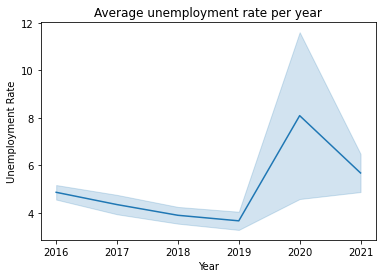

In [8]:
#Creates a line graph of the average rate of unemployment each year
fig, ax = plt.subplots()
sns.lineplot(x='Year', y='Unemployment Rate', data=unemployment_population, ci='sd', ax=ax)
ax.set_title('Average unemployment rate per year')
plt.savefig('plots/unemployment_rate_per_year.png')
plt.show()

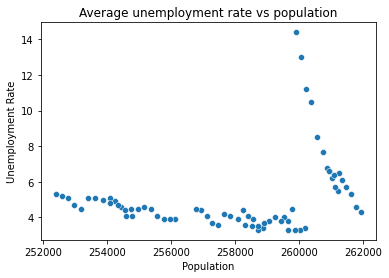

In [9]:
#Creates a scatterplot comparing the population level to the unemployment rate
fig, ax = plt.subplots()
sns.scatterplot(x='Population', y='Unemployment Rate', data=unemployment_population, ax=ax)
ax.set_title('Average unemployment rate vs population')
plt.savefig('plots/unemployment_rate_vs_population.png')
plt.show()

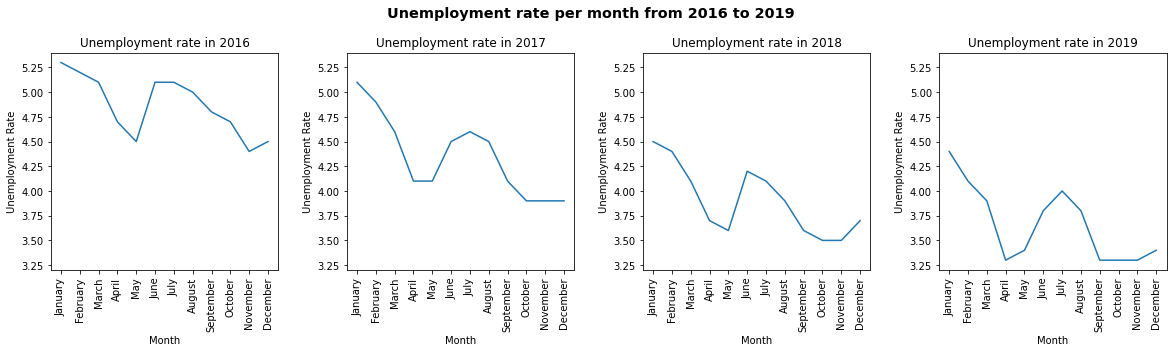

In [10]:
#Creates 4 subplots to show the unemployment rate for each month for the years 2016 to 2019
#The years 2020 and 2021 skewed the data
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20, 4), gridspec_kw={'wspace':0.3,'hspace':0.3})
unemployment_year_month[unemployment_year_month.index == 2016].plot(ax=axes[0], x='Month', y='Unemployment Rate', title='Unemployment rate in 2016', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2017].plot(ax=axes[1], x='Month', y='Unemployment Rate', title='Unemployment rate in 2017', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2018].plot(ax=axes[2], x='Month', y='Unemployment Rate', title='Unemployment rate in 2018', legend=False, xticks=range(0, 12, 1), rot=90)
unemployment_year_month[unemployment_year_month.index == 2019].plot(ax=axes[3], x='Month', y='Unemployment Rate', title='Unemployment rate in 2019', legend=False, xticks=range(0, 12, 1), rot=90)

#Shows the y-axis ticks for every subplot
axes[0].tick_params(axis='y', labelleft=True)
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)
axes[3].tick_params(axis='y', labelleft=True)

#Shows the y-axis label for every subplot
axes[0].set_ylabel('Unemployment Rate').set_visible(True)
axes[1].set_ylabel('Unemployment Rate').set_visible(True)
axes[2].set_ylabel('Unemployment Rate').set_visible(True)
axes[3].set_ylabel('Unemployment Rate').set_visible(True)

#Adds a title to the graph
plt.suptitle('Unemployment rate per month from 2016 to 2019', y=1.04, weight='semibold', size='x-large')

#Save the figure
plt.savefig('plots/unemployment_rate_per_year_month.png')
plt.show()

## 2. Unemployment Rate by Race

How does race affect unemployment?

#### Black or African American Unemployment Rate Data

In [11]:
#Pull black or african american unemployment rate data from API
black_req = requests.get(base_url.format('LNU04000006'))
black_data = black_req.json()

In [12]:
#Create a list to hold json black or african american unemployment rate data
black_unemploy = {
    'Year': [],
    'Month': [],
    'Black Unemployment Rate': []
}

#Loops through the json black or african american unemployment rate data and adds the data to the created list
for i in range(len(black_data['Results']['series'][0]['data'])):
    black_unemploy['Year'].append(int(black_data['Results']['series'][0]['data'][i]['year']))
    black_unemploy['Month'].append(str(black_data['Results']['series'][0]['data'][i]['periodName']))
    black_unemploy['Black Unemployment Rate'].append(float(black_data['Results']['series'][0]['data'][i]['value']))

#### White Unemployment Rate Data

In [13]:
#Pull white unemployment rate data from API
white_req = requests.get(base_url.format('LNU04000003'))
white_data = white_req.json()

In [14]:
#Create a list to hold json white unemployment rate data
white_unemploy = {
    'Year': [],
    'Month': [],
    'White Unemployment Rate': []
}

#Loops through the json white unemployment rate data and adds the data to the created list
for i in range(len(white_data['Results']['series'][0]['data'])):
    white_unemploy['Year'].append(int(white_data['Results']['series'][0]['data'][i]['year']))
    white_unemploy['Month'].append(str(white_data['Results']['series'][0]['data'][i]['periodName']))
    white_unemploy['White Unemployment Rate'].append(float(white_data['Results']['series'][0]['data'][i]['value']))

#### Asian Unemployment Rate Data

In [15]:
#Pull asian unemployment rate data from API
asian_req = requests.get(base_url.format('LNU04032183'))
asian_data = asian_req.json()

In [16]:
#Create a list to hold json asian unemployment rate data
asian_unemploy = {
    'Year': [],
    'Month': [],
    'Asian Unemployment Rate': []
}

#Loops through the json asian unemployment rate data and adds the data to the created list
for i in range(len(asian_data['Results']['series'][0]['data'])):
    asian_unemploy['Year'].append(int(asian_data['Results']['series'][0]['data'][i]['year']))
    asian_unemploy['Month'].append(str(asian_data['Results']['series'][0]['data'][i]['periodName']))
    asian_unemploy['Asian Unemployment Rate'].append(float(asian_data['Results']['series'][0]['data'][i]['value']))

In [17]:
#Combines the unemployment data list and the population data list
all_races = unemployed | black_unemploy | white_unemploy | asian_unemploy

#Creates a dataframe from the combined unemployment and population data list
racial_unemployment = pd.DataFrame(all_races)

### Unemployment Rate by Race Graphs

In [18]:
#Creates a list of the months
order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#Groups the racial unemployment population data by year and month
year_month = racial_unemployment.groupby(['Year', 'Month']).mean()

#Uses the list of months to sort the employment population data by month
year_month = year_month.reindex(order, level='Month')
year_month.reset_index(level='Month', inplace = True)

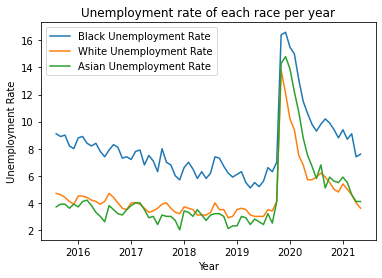

In [19]:
#Creates a line graph of the unemployment rate of each race every year
fig, ax = plt.subplots()
year_month.plot('Month', ['Black Unemployment Rate', 'White Unemployment Rate', 'Asian Unemployment Rate'], ax=ax)

#Sets the x-axis ticks and label for the graph
plt.xticks(ticks=range(5, 70, 12), labels = year_month.index.unique())
ax.set_xlabel('Year')
ax.set_ylabel('Unemployment Rate')

ax.set_title('Unemployment rate of each race per year')
plt.savefig('plots/racial_unemployment_rate_per_year.png')
plt.show()

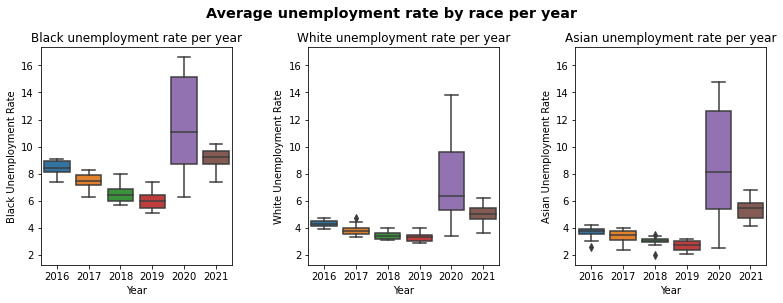

In [20]:
#Creates 3 boxplots of the unemployment rate for each race per year
fig, axes = plt.subplots(1, 3, sharey=True, gridspec_kw={'wspace': .4}, figsize=(13, 4))
sns.boxplot(ax=axes[0], data=racial_unemployment, x='Year', y='Black Unemployment Rate')
sns.boxplot(ax=axes[1], data=racial_unemployment, x='Year', y='White Unemployment Rate')
sns.boxplot(ax=axes[2], data=racial_unemployment, x='Year', y='Asian Unemployment Rate')

#Shows the y-axis ticks for every graph
axes[0].tick_params(axis='y', labelleft=True)
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)

#Sets the title of each individual subplot
axes[0].set_title('Black unemployment rate per year')
axes[1].set_title('White unemployment rate per year')
axes[2].set_title('Asian unemployment rate per year')

plt.suptitle('Average unemployment rate by race per year', y=1.02, weight='semibold', size='x-large')
plt.savefig('plots/racial_unemployment_boxplot_per_year.png')
plt.show()

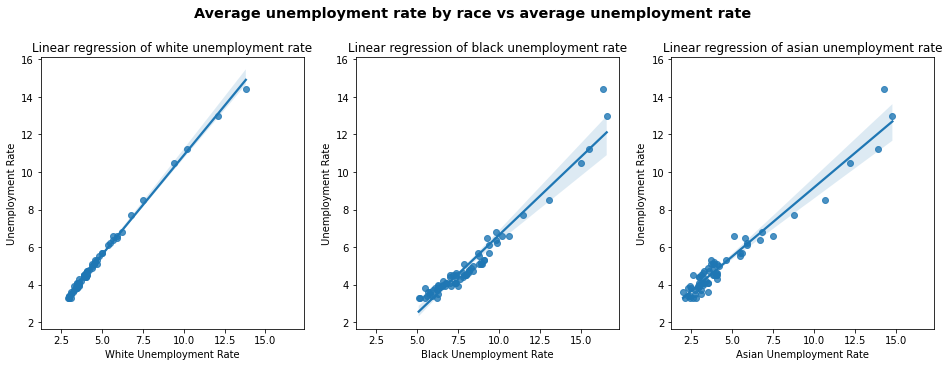

In [21]:
#Creates a regression plot to show the correlation between the national unemployment rate and the unemployment rate 
#for each race
fig, axes = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(16, 5))
sns.regplot(ax=axes[0], data=racial_unemployment, x='White Unemployment Rate', y='Unemployment Rate')
sns.regplot(ax=axes[1], data=racial_unemployment, x='Black Unemployment Rate', y='Unemployment Rate')
sns.regplot(ax=axes[2], data=racial_unemployment, x='Asian Unemployment Rate', y='Unemployment Rate')

#Shows the y-axis ticks for every graph
axes[1].tick_params(axis='y', labelleft=True)
axes[2].tick_params(axis='y', labelleft=True)

#Sets the title of each individual subplot
axes[0].set_title('Linear regression of white unemployment rate')
axes[1].set_title('Linear regression of black unemployment rate')
axes[2].set_title('Linear regression of asian unemployment rate')

plt.suptitle('Average unemployment rate by race vs average unemployment rate', y=1.02, weight='semibold', size='x-large')
plt.savefig('plots/racial_unemployment_rate_vs_national.png')
plt.show()

In [ ]:
racial_unemployment['Unemployment Rate'].corr(racial_unemployment['White Unemployment Rate'])
#Evaluates to .998

In [ ]:
racial_unemployment['Unemployment Rate'].corr(racial_unemployment['Black Unemployment Rate'])
#Evaluates to .971

In [ ]:
racial_unemployment['Unemployment Rate'].corr(racial_unemployment['Asian Unemployment Rate'])
#Evaluates to .974

## 3. Unemployment Rate by Gender

In [9]:
base_url="https://api.bls.gov/publicAPI/v2/timeseries/data/"

In [10]:
series_id='LNS14000025'
source=base_url+series_id+"?"+"registrationkey=517a0081e22e4fb38e6de19cde7b32bd"+"&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()

In [11]:
#Load the df
male_unemployment = pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#Drop cols
male_unemployment= male_unemployment.drop(columns=["latest","footnotes"])

In [12]:
# change the data type of year and value
male_unemployment["year"] = pd.to_numeric(male_unemployment["year"])
male_unemployment["value"] = pd.to_numeric(male_unemployment["value"])
#sort df by year, period, periodName
male_unemployment=male_unemployment.sort_values(["year","period","periodName"])

In [13]:
#get data from API
series_id='LNS14000026'
source=base_url+series_id+"?"+"registrationkey=517a0081e22e4fb38e6de19cde7b32bd"+"&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()

In [14]:
# convert to df, remove cols,sort values
female_unemployment = pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
female_unemployment= female_unemployment.drop(columns=["latest","footnotes"])
female_unemployment=female_unemployment.sort_values("period")

In [15]:
# convert dtypes of cols
female_unemployment["value"] = pd.to_numeric(female_unemployment["value"])
female_unemployment["year"] = pd.to_numeric(female_unemployment["year"])

In [16]:
#rename df for new df
male_unemployment=male_unemployment.rename(columns={"value": "men"})
female_unemployment=female_unemployment.rename(columns={"value": "women"})

In [17]:
#merge the male & female df
gender= pd.merge(male_unemployment,female_unemployment,on=['year','period','periodName'])

### Unemployment Rate Distribution Over Time by Gender

Text(0.5, 0.95, 'Unemployment Rate Distribution Over Time by Gender')

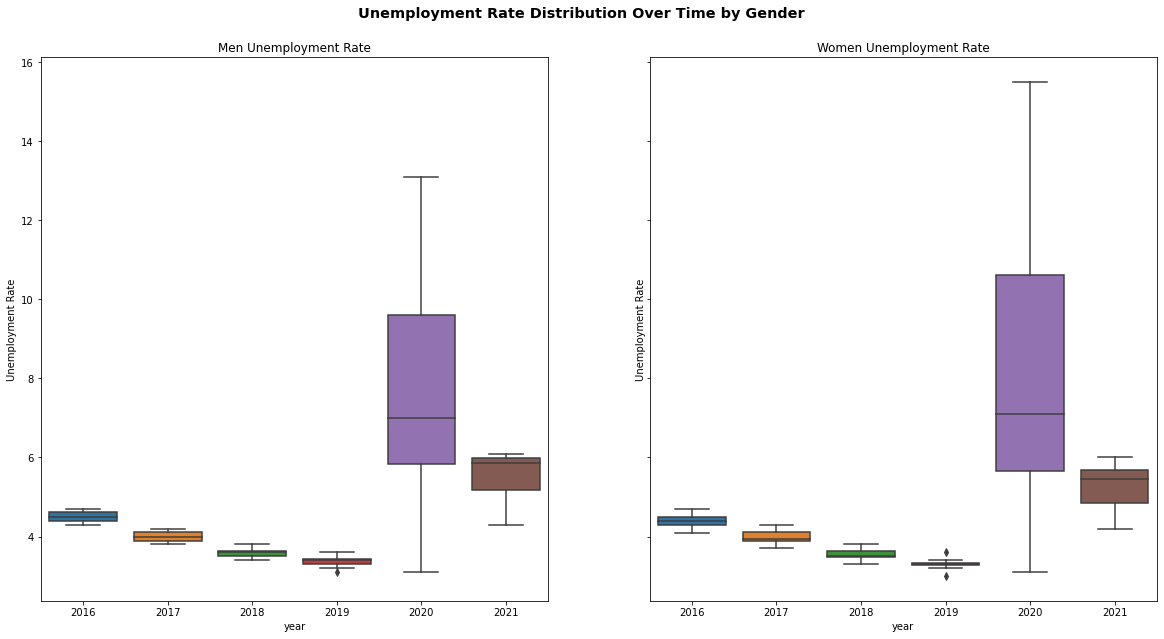

In [18]:
#create boxplots
fig, axes = plt.subplots(1, 2, sharey=True,figsize=(20,10))
sns.boxplot(ax=axes[0], data=gender, x='year', y='men')
sns.boxplot(ax=axes[1], data=gender, x='year', y='women')
axes[0].set_ylabel('Unemployment Rate')
axes[1].set_ylabel('Unemployment Rate')
axes[0].set_title('Men Unemployment Rate')
axes[1].set_title('Women Unemployment Rate')
plt.suptitle("Unemployment Rate Distribution Over Time by Gender",y=.95, size='x-large',weight='bold')

In [19]:
#men's yearly average rate 
men_y_avg=pd.DataFrame(male_unemployment.groupby('year')['men'].mean())
#women's yearly average rate
women_y_avg=pd.DataFrame(female_unemployment.groupby('year')['women'].mean())

### Average Unemployment Rate Over Time Per Gender Over Time

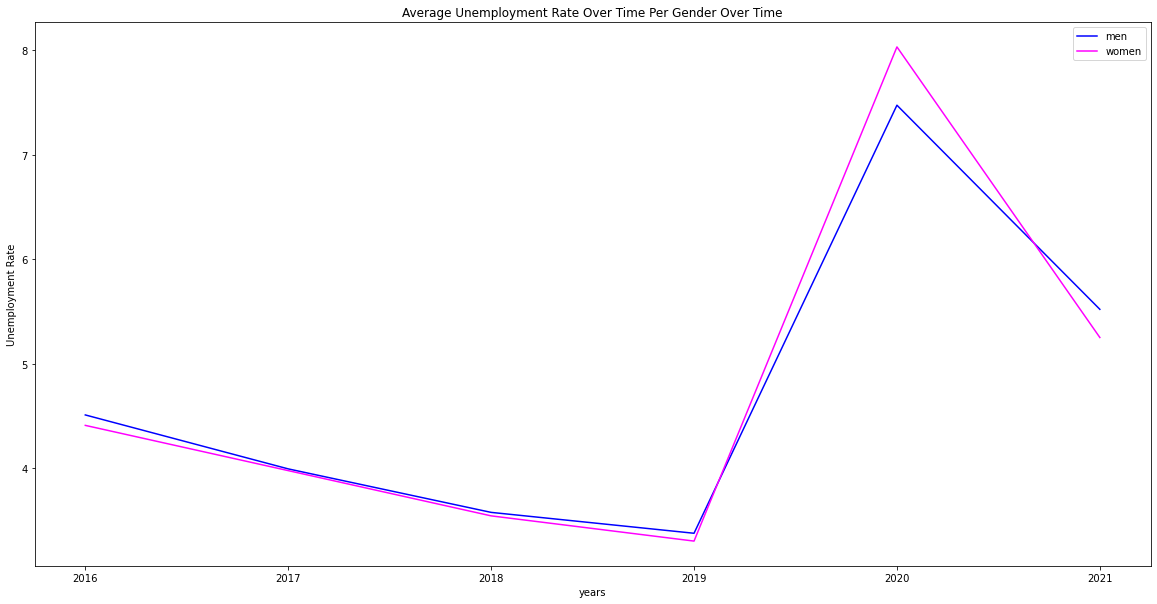

In [20]:
# create line plot for genders
fig, ax = plt.subplots(figsize=(20,10))
ax.plot( men_y_avg.index, 'men', data=men_y_avg, color='blue')
ax.plot( women_y_avg.index, 'women', data=women_y_avg, color='magenta')
ax.set_title('Average Unemployment Rate Over Time Per Gender Over Time')
ax.set_xlabel('years')
ax.set_ylabel('Unemployment Rate')
plt.legend()

In [21]:
#subset each year for male
m_2016 = male_unemployment[male_unemployment["year"]==2016]
m_2017 = male_unemployment[male_unemployment["year"]==2017]
m_2018 = male_unemployment[male_unemployment["year"]==2018]
m_2019 = male_unemployment[male_unemployment["year"]==2018]
m_2020 = male_unemployment[male_unemployment["year"]==2020]

In [22]:
#subset each year for female
f_2016 = female_unemployment[female_unemployment["year"]==2016]
f_2017 = female_unemployment[female_unemployment["year"]==2017]
f_2018 = female_unemployment[female_unemployment["year"]==2018]
f_2019 = female_unemployment[female_unemployment["year"]==2018]
f_2020 = female_unemployment[female_unemployment["year"]==2020]

### Unemployment Rate Per Month from 2016 to 2019

Text(0.5, 1.0, 'Unemployment Rate Per Month from 2016 to 2019')

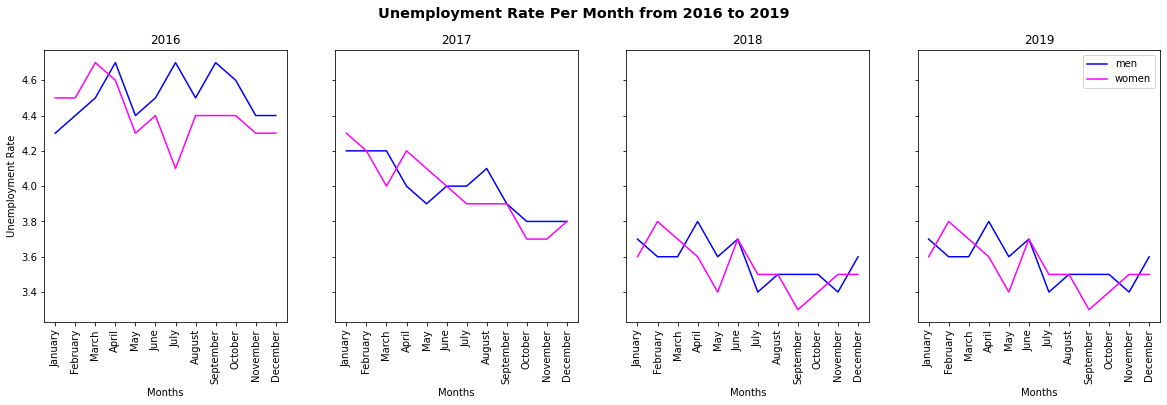

In [25]:
# line plot for each year by gender
fig, ax = plt.subplots(1,4,figsize=(20,5),sharey=True)

ax[0].plot(m_2016["periodName"],m_2016["men"],color='blue',label="men")
ax[0].plot(f_2016["periodName"],f_2016["women"],color='magenta',label="women")

ax[1].plot(m_2017["periodName"],m_2017["men"],color='blue',label="men")
ax[1].plot(f_2017["periodName"],f_2017["women"],color='magenta',label="women")

ax[2].plot(m_2018["periodName"],m_2018["men"],color='blue',label="men")
ax[2].plot(f_2018["periodName"],f_2018["women"],color='magenta',label="women")


ax[3].plot(m_2019["periodName"],m_2019["men"],color='blue',label="men")
ax[3].plot(f_2019["periodName"],f_2019["women"],color='magenta',label="women")


ax[0].set_ylabel('Unemployment Rate')

ax[0].set_xlabel('Months')
ax[1].set_xlabel('Months')
ax[2].set_xlabel('Months')
ax[3].set_xlabel('Months')

ax[0].set_title('2016')
ax[1].set_title('2017')
ax[2].set_title('2018')
ax[3].set_title('2019')

ax[0].set_xticklabels(m_2016["periodName"], rotation=90)
ax[1].set_xticklabels(m_2017["periodName"], rotation=90)
ax[2].set_xticklabels(m_2018["periodName"], rotation=90)
ax[3].set_xticklabels(m_2019["periodName"], rotation=90)

plt.legend()

plt.suptitle('Unemployment Rate Per Month from 2016 to 2019', y=1.00, weight='bold', size='x-large')

### Men & Women Unemployment Rate in 2020

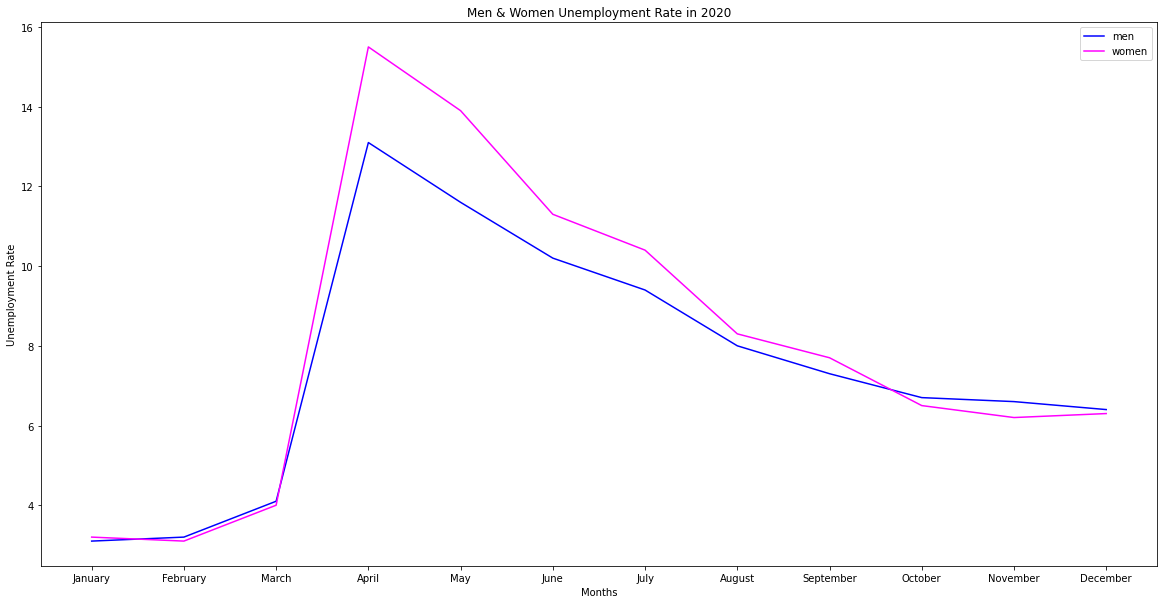

In [26]:
# closer look at 2020 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot('periodName' , 'men', data=m_2020, color='blue')
ax.plot( 'periodName', 'women', data=f_2020, color='magenta')
ax.set_title('Men & Women Unemployment Rate in 2020')
ax.set_ylabel('Unemployment Rate')
ax.set_xlabel('Months')
plt.legend()

## 4. Unemployment Rate by Education

In [3]:
#Get less_than_HS data from API
series_id='LNS14027659'
source=base_url+series_id+"?&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()
less_than_hs= pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#rename col
less_than_hs=less_than_hs.rename(columns={"value": "less_than_hs"})

In [4]:
#Get HS data from API
series_id='LNS14027660'
source=base_url+series_id+"?registrationkey=517a0081e22e4fb38e6de19cde7b32bd&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()
hs= pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#rename col
hs=hs.rename(columns={"value": "hs"})

In [5]:
#Get some college data from API
series_id='LNS14027689'
source=base_url+series_id+"?registrationkey=517a0081e22e4fb38e6de19cde7b32bd&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()
some_college= pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#rename col
some_college=some_college.rename(columns={"value": "some_college"})

In [6]:
#Get college data from API
series_id='LNS14027662'
source=base_url+series_id+"?registrationkey=517a0081e22e4fb38e6de19cde7b32bd&startyear=2016&endyear=2021"
req = requests.get(source)
data = req.json()
college= pd.DataFrame.from_dict(data['Results']['series'][0]['data'])
#rename col
college=college.rename(columns={"value": "college"})

In [7]:
# merge all the education dfs
education=less_than_hs.merge(hs,on=['year','period','periodName']).merge(some_college,on=['year','period','periodName']).merge(
college,on=['year','period','periodName'])

In [29]:
#drop uncessary cols
education=education.drop(columns=['latest_x',
       'footnotes_x', 'latest_y', 'footnotes_y', 'latest_x',
       'footnotes_x', 'latest_y', 'footnotes_y'])

In [30]:
#convert dtypes
education.loc[:,"less_than_hs"] = pd.to_numeric(education["less_than_hs"])
education.loc[:,"hs"] = pd.to_numeric(education["hs"])
education.loc[:,"some_college"] = pd.to_numeric(education["some_college"])
education.loc[:,"college"] = pd.to_numeric(education["college"])
education["year"] = pd.to_numeric(education["year"])

In [31]:
# yearly avg
yearly=education.groupby("year")[["less_than_hs","hs","some_college","college"]].mean()
yearly

,less_than_hs,hs,some_college,college
year,,,,
2016,7.458333,5.175000,4.091667,2.508333
2017,6.525000,4.641667,3.741667,2.325000
2018,5.600000,4.058333,3.325000,2.133333
2019,5.383333,3.666667,3.033333,2.108333
2020,11.891667,9.133333,7.808333,4.833333
2021,8.860000,6.520000,5.450000,3.250000


### Average Unemployment Rate Per Year by Education Over Time 

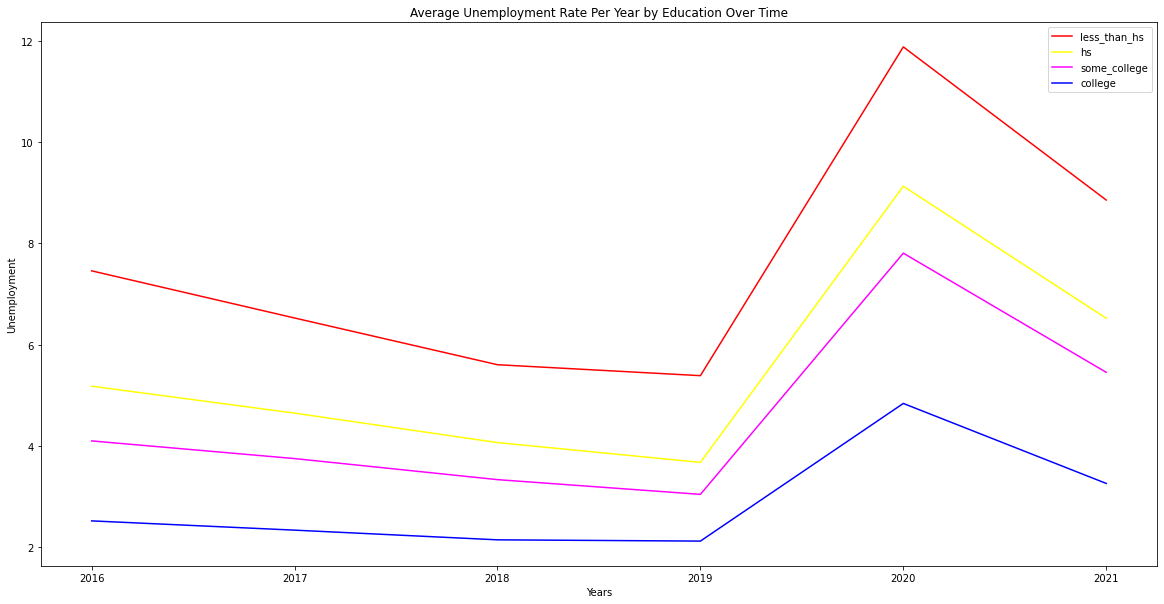

In [32]:
#create multiline plot
fig, ax = plt.subplots(figsize=(20,10))
ax.plot( yearly.index, 'less_than_hs', data=yearly, color='red')
ax.plot( yearly.index, 'hs', data=yearly, color='yellow')
ax.plot( yearly.index, 'some_college', data=yearly, color='magenta')
ax.plot( yearly.index, 'college', data=yearly, color='blue')
ax.set_xlabel('Years')
ax.set_ylabel('Unemployment')
ax.set_title('Average Unemployment Rate Per Year by Education Over Time')
plt.legend()

In [35]:
#subset each year
edu_2021= education[education["year"]==2021]
edu_2020= education[education["year"]==2020]
edu_2019= education[education["year"]==2019]
edu_2018= education[education["year"]==2018]
edu_2017= education[education["year"]==2017]
edu_2016= education[education["year"]==2016]

### Average Unemployment Rate Per Year by Education Over Time

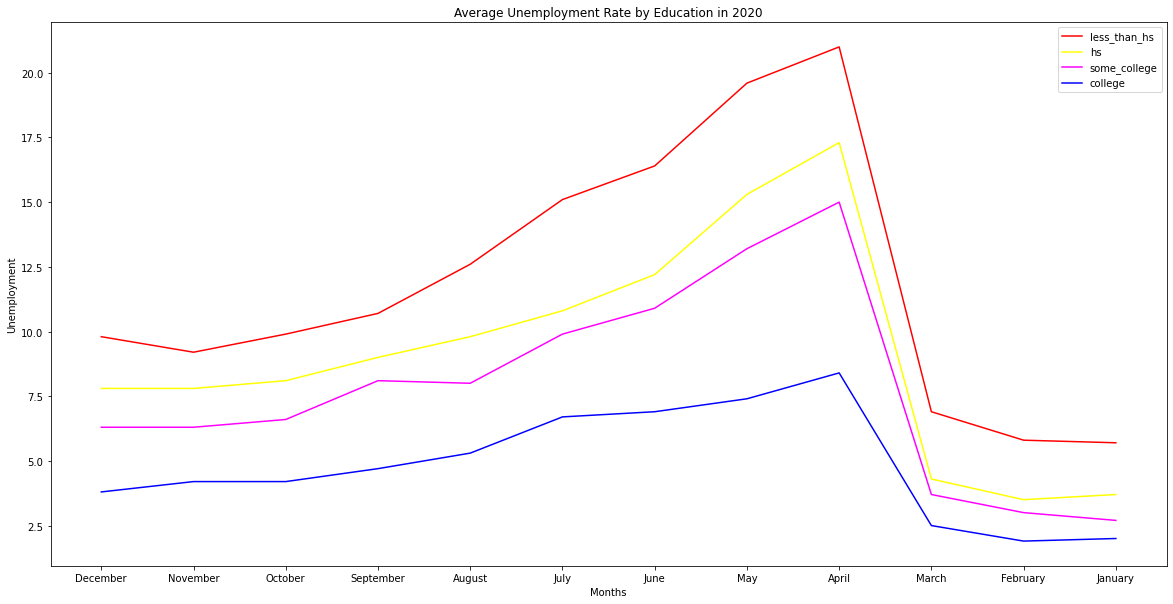

In [40]:
#line plot for 2020
fig, ax = plt.subplots(figsize=(20,10))
ax.plot( edu_2020['periodName'], 'less_than_hs', data=edu_2020, color='red')
ax.plot( edu_2020['periodName'], 'hs', data=edu_2020, color='yellow')
ax.plot( edu_2020['periodName'], 'some_college', data=edu_2020, color='magenta')
ax.plot( edu_2020['periodName'], 'college', data=edu_2020, color='blue')
ax.set_xlabel('Months')
ax.set_ylabel('Unemployment')
ax.set_title('Average Unemployment Rate by Education in 2020')
plt.legend()
plt.show()

###  Unemployment Rate Distribution Over Time by Education Level

Text(0.5, 1.0, 'Unemployment Rate Distribution Over Time by Education Level')

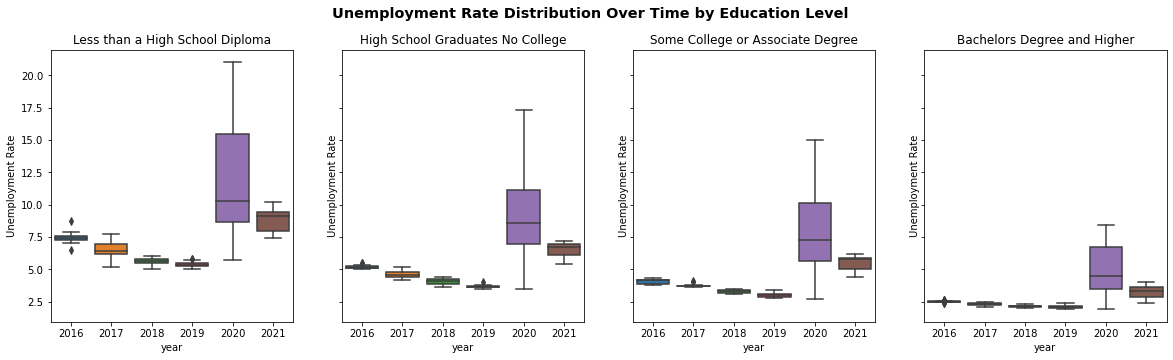

In [37]:
#create boxplot by education level
fig, axes = plt.subplots(1, 4, sharey=True,figsize=(20,5))
sns.boxplot(ax=axes[0], data=education, x='year', y="less_than_hs")
sns.boxplot(ax=axes[1], data=education, x='year', y="hs")
sns.boxplot(ax=axes[2], data=education, x='year', y="some_college")
sns.boxplot(ax=axes[3], data=education, x='year', y="college")
axes[0].set_ylabel('Unemployment Rate')
axes[1].set_ylabel('Unemployment Rate')
axes[2].set_ylabel('Unemployment Rate')
axes[3].set_ylabel('Unemployment Rate')

axes[0].set_title('Less than a High School Diploma')
axes[1].set_title('High School Graduates No College')
axes[2].set_title('Some College or Associate Degree')
axes[3].set_title('Bachelors Degree and Higher')
plt.suptitle("Unemployment Rate Distribution Over Time by Education Level",y=1.00, size='x-large',weight='bold')

In [38]:
# subset each eduation -- df were empty after merging?
less_than_hs=education.iloc[:,0:4]
hs=education.loc[:,["year","period","periodName","hs"]]
some_college= education.loc[:,["year","period","periodName","some_college"]]
college= education.loc[:,["year","period","periodName","college"]]

#subset each year for less than hs
less_hs_2016 = less_than_hs[less_than_hs["year"]==2016]
less_hs_2017 = less_than_hs[less_than_hs["year"]==2017]
less_hs_2018 = less_than_hs[less_than_hs["year"]==2018]
less_hs_2019 = less_than_hs[less_than_hs["year"]==2018]
less_hs_2020 = less_than_hs[less_than_hs["year"]==2020]

#subset each year for hs
hs_2016 = hs[hs["year"]==2016]
hs_2017 = hs[hs["year"]==2017]
hs_2018 = hs[hs["year"]==2018]
hs_2019 = hs[hs["year"]==2018]
hs_2020 = hs[hs["year"]==2020]

#subset each year for some_college
some_college_2016 = some_college[some_college["year"]==2016]
some_college_2017 = some_college[some_college["year"]==2017]
some_college_2018 = some_college[some_college["year"]==2018]
some_college_2019 = some_college[some_college["year"]==2018]
some_college_2020 = some_college[some_college["year"]==2020]

#subset each year for college
college_2016 = college[college["year"]==2016]
college_2017 = college[college["year"]==2017]
college_2018 = college[college["year"]==2018]
college_2019 = college[college["year"]==2018]
college_2020 = college[college["year"]==2020]

### Unemployment Rate Per Month from 2016 to 2019 by Education

Text(0.5, 1.0, 'Unemployment Rate Per Month from 2016 to 2019 by Education')

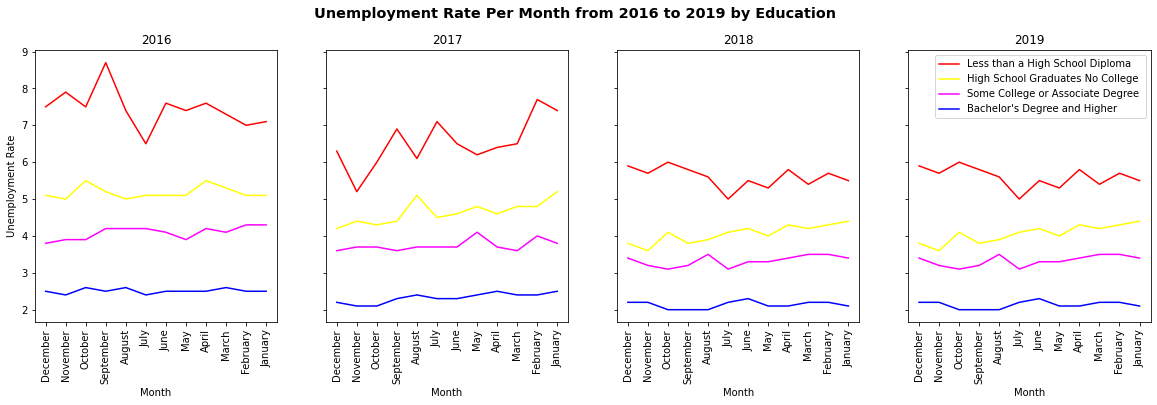

In [41]:
#create boxplots for each year
fig, ax = plt.subplots(1,4,figsize=(20,5),sharey=True,sharex=True)

ax[0].plot(less_hs_2016["periodName"],less_hs_2016["less_than_hs"],color='red',label="Less than a High School Diploma ")
ax[0].plot(hs_2016["periodName"],hs_2016["hs"],color='yellow',label="High School Graduates No College ")
ax[0].plot(some_college_2016["periodName"],some_college_2016["some_college"],color='magenta',label="Some College or Associate Degree")
ax[0].plot(college_2016["periodName"],college_2016["college"],color='blue',label="Bachelor's Degree and Higher ")


ax[1].plot(less_hs_2017["periodName"],less_hs_2017["less_than_hs"],color='red',label="Less than a High School Diploma ")
ax[1].plot(hs_2017["periodName"],hs_2017["hs"],color='yellow',label="High School Graduates No College ")
ax[1].plot(some_college_2017["periodName"],some_college_2017["some_college"],color='magenta',label="Some College or Associate Degree")
ax[1].plot(college_2017["periodName"],college_2017["college"],color='blue',label="Bachelor's Degree and Higher ")


ax[2].plot(less_hs_2018["periodName"],less_hs_2018["less_than_hs"],color='red',label="Less than a High School Diploma ")
ax[2].plot(hs_2018["periodName"],hs_2018["hs"],color='yellow',label="High School Graduates No College ")
ax[2].plot(some_college_2018["periodName"],some_college_2018["some_college"],color='magenta',label="Some College or Associate Degree")
ax[2].plot(college_2018["periodName"],college_2018["college"],color='blue',label="Bachelor's Degree and Higher ")

ax[3].plot(less_hs_2019["periodName"],less_hs_2019["less_than_hs"],color='red',label="Less than a High School Diploma ")
ax[3].plot(hs_2019["periodName"],hs_2019["hs"],color='yellow',label="High School Graduates No College ")
ax[3].plot(some_college_2019["periodName"],some_college_2019["some_college"],color='magenta',label="Some College or Associate Degree")
ax[3].plot(college_2019["periodName"],college_2019["college"],color='blue',label="Bachelor's Degree and Higher ")

ax[0].set_ylabel('Unemployment Rate')
ax[0].set_xlabel('Month')
ax[1].set_xlabel('Month')
ax[2].set_xlabel('Month')
ax[3].set_xlabel('Month')

ax[0].set_title('2016')
ax[1].set_title('2017')
ax[2].set_title('2018')
ax[3].set_title('2019')

ax[0].set_xticklabels(less_hs_2016["periodName"], rotation=90)
ax[1].set_xticklabels(less_hs_2017["periodName"], rotation=90)
ax[2].set_xticklabels(less_hs_2018["periodName"], rotation=90)
ax[3].set_xticklabels(less_hs_2019["periodName"], rotation=90)

plt.legend()

plt.suptitle('Unemployment Rate Per Month from 2016 to 2019 by Education', y=1.00, weight='bold', size='x-large')
